In [1]:
"""Using the Biot-Savart law to find the magnetic field at a given point, in the presence of a current-carrying coil"""

'Using the Biot-Savart law to find the magnetic field at a given point, in the presence of a current-carrying coil'

In [2]:
#import relevant modules
import numpy
import matplotlib.pyplot as plt
import scipy

In [3]:
I = 20 #Current / A
mu0 = 4*numpy.pi*1e-7 #Vacuum permeability / H/m
k = mu0/(4*numpy.pi) #Constant

In [4]:
wire = [(0,0,0),(1,0,0),(1,1,0),(0,1,0)] #vertex coordinates of square coil loop
x = 5
y = 5
z = 0

#(can be replaced with other coordinates provided that they are joined by straight lines to make the wire/loop) 


In [5]:
#function for the vector (Bx, By, Bz) at a given point

def Bfield(x,y,z):
    for i in range(len(wire)): #decrease range by 1 if doing a line, not a loop
        dlx = wire[i][0]-wire[i-1][0] #x-component of wire element vector
        dly = wire[i][1]-wire[i-1][1] #y-component """"""
        dlz = wire[i][2]-wire[i-1][2] #z-component """"""
        dl = [dlx,dly,dlz] 
        displacement_x = x - (wire[i][0]+dlx) #x-component of displacement vector from given point to wire element
        displacement_y = y - (wire[i][1]+dly) #y-component """"""
        displacement_z = z - (wire[i][2]+dlz) #z-component """"""
        displacementvec = numpy.array([displacement_x, displacement_y, displacement_z])
        mag_r = (displacement_x**2 + displacement_y**2 + displacement_z**2)**0.5 #magnitude of displacement vector
        a = k*I*numpy.cross(dl, displacementvec) / mag_r**3 #implements Biot-Savart equation to give (Bx, By, Bz)
        return a


#function for the magnitude of the B-field at a given point

def Bfield_Mag(x,y,z):
    for i in range(len(wire)):
        dlx = wire[i][0]-wire[i-1][0]
        dly = wire[i][1]-wire[i-1][1]
        dlz = wire[i][2]-wire[i-1][2]
        dl = [dlx,dly,dlz]
        displacement_x = x - (wire[i][0]+dlx)
        displacement_y = y - (wire[i][1]+dly)
        displacement_z = z - (wire[i][2]+dlz)
        displacementvec = [displacement_x, displacement_y, displacement_z]
        mag_r = (displacement_x**2 + displacement_y**2 + displacement_z**2)**0.5
        a = k*I*numpy.cross(dl, displacementvec)/mag_r**3 
        print(a)
        b = (a[0]**2 + a[1]**2 + a[2]**2)**0.5 #finds magnitude of (Bx, By, Bz)
        return b

print(Bfield_Mag(x,y,z))

[0.00000000e+00 0.00000000e+00 2.09896524e-08]
2.0989652448015743e-08


In [6]:
"""Function test for single (x,y,z)"""

x = 5
y = 5
z = 0

print("(Bx, By, Bz) =" , "(",Bfield(x,y,z)[0], "," ,Bfield(x,y,z)[1], "," , Bfield(x,y,z)[2], ")")
print("|B| =", Bfield_Mag(x,y,z), "T")


(Bx, By, Bz) = ( 0.0 , 0.0 , 2.0989652448015743e-08 )
[0.00000000e+00 0.00000000e+00 2.09896524e-08]
|B| = 2.0989652448015743e-08 T


In [7]:
wire = [(0,0,0),(1,0,0),(1,1,0),(0,1,0)]

x = numpy.linspace(-5,5,1000) #x-coordinate of given point
y = numpy.linspace(-5,5,1000) #y-coordinate """"""
z = numpy.linspace(-5,5,1000) #z-coordinate """"""



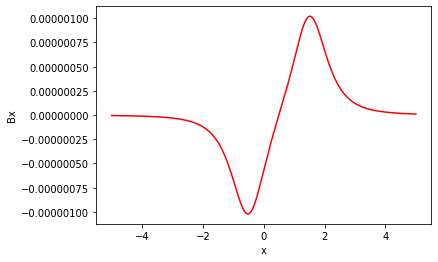

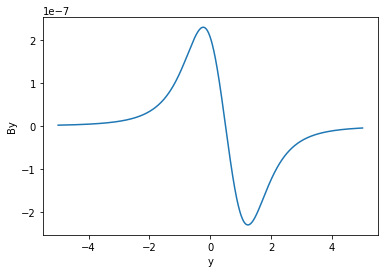

In [8]:
def Bplot(x,y,z):
    result = numpy.zeros((len(x),3))
    for i in range(len(wire)):
        dlx = wire[i][0]-wire[i-1][0]
        dly = wire[i][1]-wire[i-1][1]
        dlz = wire[i][2]-wire[i-1][2]
        dl = [dlx,dly,dlz]
        displacement_x = numpy.zeros([len(x)])
        displacement_y = numpy.zeros([len(x)])
        displacement_z = numpy.zeros([len(x)])
        for j in range(len(x)):
                displacement_x[j] = x[j] - (wire[i][0]+dlx)
                displacement_y[j] = y[j] - (wire[i][1]+dly)
                displacement_z[j] = z[j] - (wire[i][2]+dlz)
                displacementvec = [displacement_x[j], displacement_y[j], displacement_z[j]]
                mag_r = (displacement_x[j]**2 + displacement_y[j]**2 + displacement_z[j]**2)**0.5
                a = k*I*numpy.cross(dl, displacementvec)/mag_r**3 #a = B field at one point due to one coil
                result[j,0] += a[0]
                result[j,1] += a[1]
                result[j,2] += a[2]
          
    return result


"""Graphs of Bx and By at constant z (z = 1)"""
z = numpy.ones(1000)

plt.plot(x, Bplot(x,y,z)[:,0], color = 'r')
plt.xlabel("x")
plt.ylabel("Bx")
plt.show()

plt.plot(y, Bplot(x,y,z)[:,1])
plt.xlabel("y")
plt.ylabel("By")
plt.show()
#does this actually show anything?? surely we need Bx and By on the same set of axes

In [9]:
#add another coil (Helmhotlz setup) CENTRE COILS

I_1 = 20 #Current / A in coil 1
mu0 = 4*numpy.pi*1e-7 #Vacuum permeability / H/m
k = mu0/(4*numpy.pi) #Constant
wire_1 = [(-1.5,-1.5,-0.81675),(1.5,-1.5,-0.81675),(1.5,1.5,-0.81675),(-1.5,1.5,-0.81675)] #vertex coordinates of square coil 1


I_2 = 20 #Current / A in coil 2
mu0 = 4*numpy.pi*1e-7 #Vacuum permeability / H/m
k = mu0/(4*numpy.pi) #Constant
wire_2 = [(-1.5,-1.5,0.81675),(1.5,-1.5,0.81675),(1.5,1.5,0.81675),(-1.5,1.5,0.81675)] #vertex coordinates of square coil 2

x = numpy.linspace(-5,5,1000) #x-coordinate of given point
y = numpy.linspace(-5,5,1000) #y-coordinate """"""
z = numpy.linspace(-5,5,1000) #z-coordinate """"""

In [10]:
def Bfieldtotal(x,y,z):
    
    result_tot = numpy.zeros((len(x),3))
    
    for i in range(len(wire_1)): #decrease range by 1 if doing a line, not a loop
        dlx1 = wire_1[i][0]-wire_1[i-1][0] #x-component of wire element vector
        dly1 = wire_1[i][1]-wire_1[i-1][1] #y-component """"""
        dlz1 = wire_1[i][2]-wire_1[i-1][2] #z-component """"""
        dl1 = [dlx1,dly1,dlz1] 
        displacement_x1 = numpy.zeros([len(x)])
        displacement_y1 = numpy.zeros([len(x)])
        displacement_z1 = numpy.zeros([len(x)])
    
        
        dlx2 = wire_2[i][0]-wire_2[i-1][0] #x-component of wire element vector
        dly2 = wire_2[i][1]-wire_2[i-1][1] #y-component """"""
        dlz2 = wire_2[i][2]-wire_2[i-1][2] #z-component """"""
        dl2 = [dlx2,dly2,dlz2] 
        displacement_x2 = numpy.zeros([len(x)])
        displacement_y2 = numpy.zeros([len(x)])
        displacement_z2 = numpy.zeros([len(x)])
        
        
        for j in range(len(x)):
            displacement_x1[j] = x[j] - (wire_1[i][0]+dlx1) #x-component of displacement vector from given point to wire element
            displacement_y1[j] = y[j] - (wire_1[i][1]+dly1) #y-component """"""
            displacement_z1[j] = z[j] - (wire_1[i][2]+dlz1) #z-component """"""
            displacementvec1 = numpy.array([displacement_x1[j], displacement_y1[j], displacement_z1[j]])
            mag_r1 = (displacement_x1[j]**2 + displacement_y1[j]**2 + displacement_z1[j]**2)**0.5 #magnitude of displacement vector
            a1 = k*I_1*numpy.cross(dl1, displacementvec1) / mag_r1**3 #implements Biot-Savart equation to give (Bx, By, Bz)
            
            
            displacement_x2[j] = x[j] - (wire_2[i][0]+dlx2) #x-component of displacement vector from given point to wire element
            displacement_y2[j] = y[j] - (wire_2[i][1]+dly2) #y-component """"""
            displacement_z2[j] = z[j] - (wire_2[i][2]+dlz2) #z-component """"""
            displacementvec2 = numpy.array([displacement_x2[j], displacement_y2[j], displacement_z2[j]])
            mag_r2 = (displacement_x2[j]**2 + displacement_y2[j]**2 + displacement_z2[j]**2)**0.5 #magnitude of displacement vector
            a2 = k*I_2*numpy.cross(dl2, displacementvec2) / mag_r2**3 #implements Biot-Savart equation to give (Bx, By, Bz)
           
            a_tot = a1+a2
            result_tot[j,0] += a_tot[0]
            result_tot[j,1] += a_tot[1]
            result_tot[j,2] += a_tot[2]

    return result_tot
    


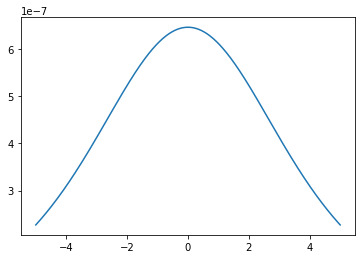

In [11]:
x = numpy.zeros(1000) #x-coordinate of given point
y = numpy.zeros(1000) #y-coordinate """"""



plt.plot(z, Bfieldtotal(x,y,z)[:,2]) #x and y fields seem to be an issue hmm





Text(0, 0.5, 'Bz from equation')

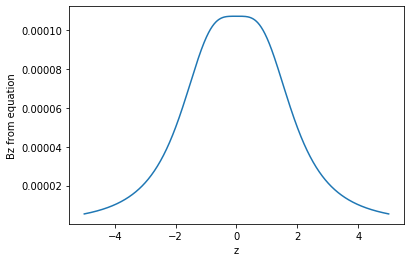

In [12]:
#Square Helmholtz pair

z = numpy.linspace(-5,5,1000)

def B(z):
    a = 1.5 #1/2 side length of square
    N = 1 #number of turns on coils
    h = 1.089*a #separation distance (z-direction)
    firstterm = 1/((a**2 + (z - h/2)**2) * numpy.sqrt(2*(a**2) + (z - h/2)**2))
    secondterm = 1/((a**2 + (z + h/2)**2) * numpy.sqrt(2*(a**2) + (z + h/2)**2))
    B = (mu0*N*I/4*numpy.pi) * 8 * a**2 * (firstterm + secondterm) #possibly add z hat??
    return B

plt.plot(z, B(z))
plt.xlabel("z")
plt.ylabel("Bz from equation") 

#tldr we're correct. what we need is to fine tune numbers